# 1. Import Ntuple and DecayHash

In [4]:
import root_pandas
import decayHash
import basf2
from decayHash import DecayHashMap
import numpy as np
import ROOT
import pandas

# read in root-file as a pandas dataframe
filename='../Ntuples/bengal_e_50k_sideband2.root'
decayhash='../Ntuples/hashmap_bengal_e_50k_sideband2.root'
#data = uproot.open(filename)['B0'].arrays(library="pd")
data = root_pandas.read_root(filename,key='B0')
hashmap = DecayHashMap(decayhash, removeRadiativeGammaFlag=False)
hashmap2 = DecayHashMap(decayhash, removeRadiativeGammaFlag=True)

In [19]:
import root_pandas
import decayHash
import basf2
from decayHash import DecayHashMap
import numpy as np
import ROOT
import pandas

# read in root-file as a pandas dataframe
filename='../Ntuples/bengal_e_50k.root'
decayhash='../Ntuples/hashmap_bengal_e_50k.root'
#data = uproot.open(filename)['B0'].arrays(library="pd")
data = root_pandas.read_root(filename,key='B0')
hashmap = DecayHashMap(decayhash, removeRadiativeGammaFlag=False)
hashmap2 = DecayHashMap(decayhash, removeRadiativeGammaFlag=True)

In [ ]:
import pandas
pandas.set_option('display.max_rows', None)
print(data.isna().sum())

# 2. Add DecayMode column to the Ntuple

In [6]:
data['DecayMode'] = data.apply(decay_mode, axis=1).astype('category') #axis=0 will allow the application to be done at a column

data['B0_isSignal'] = data['B0_isSignal'].fillna(-1)
data['D_isSignal'] = data['D_isSignal'].fillna(-1)
data['e_isSignal'] = data['e_isSignal'].fillna(-1)
data['B0_mcPDG'] = data['B0_mcPDG'].fillna(0)
data['isSignal'] = 1.0
data.eval('B_D_ReChi2 = B0_vtxReChi2 + D_vtxReChi2', inplace=True)
data.eval('p_D_l = D_CMS_p + e_CMS_p', inplace=True)

# Calculate the q2 in different ways
data.eval('q2_SigOnly = (0.5*Ecms - D_CMS_E)**2 - D_CMS_px**2 - D_CMS_py**2 - D_CMS_pz**2', inplace=True)
data.eval('MM2_SigOnly = (0.5*Ecms - D_CMS_E - e_CMS_E)**2 - (D_CMS_px + e_CMS_px)**2 - (D_CMS_py + e_CMS_py)**2 - (D_CMS_pz + e_CMS_pz)**2', inplace=True)

data.DecayMode.value_counts()

sig_D_e_nu      48217
sig_D_tau_nu        2
Name: DecayMode, dtype: int64

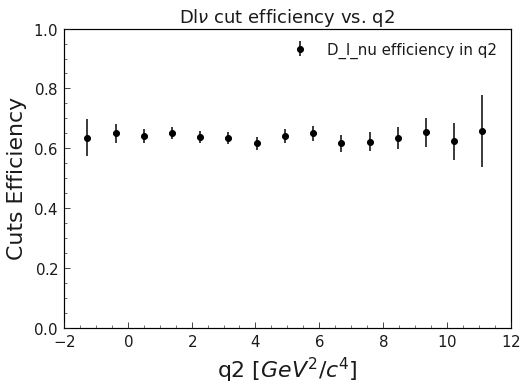

In [8]:
plot_q2_efficiency(cut='-2<B0_CMS3_weQ2lnuSimple<13')
plt.xlabel("q2 $[GeV^2/c^4]$")
plt.ylabel('Cuts Efficiency')
plt.title('Dl$\\nu$ cut efficiency vs. q2');
plt.xlim(-2,12);
plt.ylim(0,1);

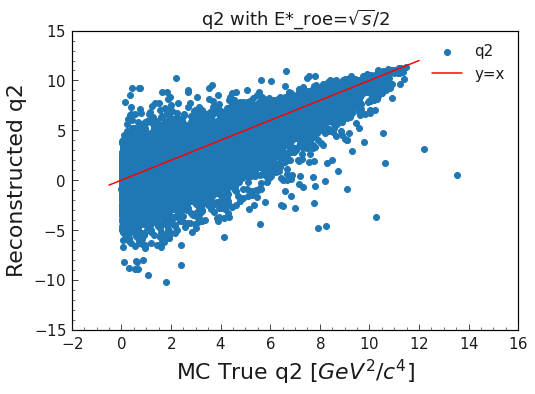

In [14]:
plt.scatter(sig_D_e_nu.q2_MC, sig_D_e_nu.B0_CMS2_weQ2lnuSimple,label='q2')
x = np.linspace(-0.5, 12, 10)
plt.plot(x,x,color='red',label='y=x')
plt.xlabel("MC True q2 $[GeV^2/c^4]$")
plt.ylabel('Reconstructed q2')
plt.title('q2 with E*_roe=$\sqrt{s}/2$')
plt.legend();

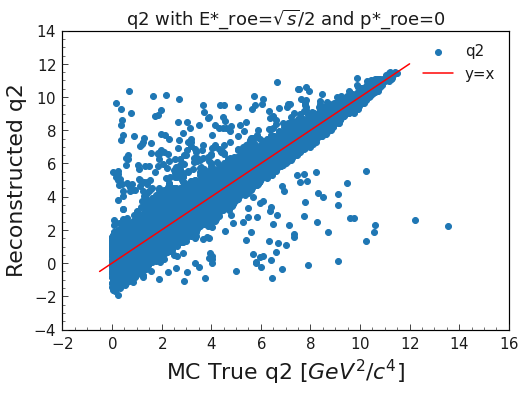

In [15]:
plt.scatter(sig_D_e_nu.q2_MC, sig_D_e_nu.B0_CMS3_weQ2lnuSimple,label='q2')
x = np.linspace(-0.5, 12, 10)
plt.plot(x,x,color='red',label='y=x')
plt.xlabel("MC True q2 $[GeV^2/c^4]$")
plt.ylabel('Reconstructed q2')
plt.title('q2 with E*_roe=$\sqrt{s}/2$ and p*_roe=0')
plt.legend();

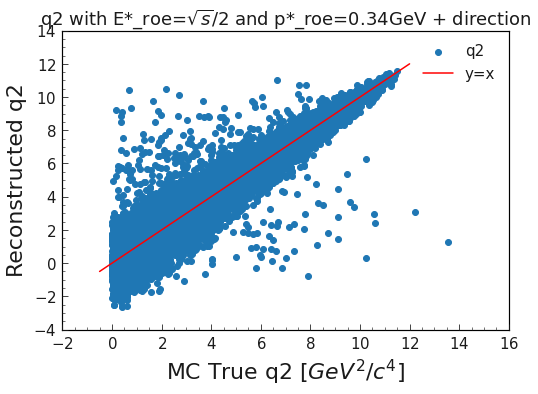

In [16]:
plt.scatter(sig_D_e_nu.q2_MC, sig_D_e_nu.B0_CMS4_weQ2lnuSimple,label='q2')
x = np.linspace(-0.5, 12, 10)
plt.plot(x,x,color='red',label='y=x')
plt.xlabel("MC True q2 $[GeV^2/c^4]$")
plt.ylabel('Reconstructed q2')
plt.title('q2 with E*_roe=$\sqrt{s}/2$ and p*_roe=0.34GeV + direction')
plt.legend();